**Histogram Equalization**

Histogram equalization is a widely used contrast-enhancement technique in image processing because of its high eﬃciency and simplicity.

It is one of the sophisticated methods for modifying the dynamic range and contrast of an image by altering that image such that its intensity histogram has the desired shape.

Contrast is defined as the difference in intensity between two objects in an image. If the contrast is too low, it is impossible to distinguish between two objects, and they are seen as a single object. 

In [9]:
import numpy as np 

def imhist(im):
	m, n = im.shape
	h = [0.0] * 256
	for i in range(m):
		for j in range(n):
			h[im[i, j]]+=1
	return np.array(h)/(m*n)

def cumsum(h):
	# finds cumulative sum of a numpy array, list
	return [sum(h[:i+1]) for i in range(len(h))]

def histeq(im):
	#calculate Histogram
	h = imhist(im)
	cdf = np.array(cumsum(h)) #cumulative distribution function
	sk = np.uint8(255 * cdf) #finding transfer function values
	s1, s2 = im.shape
	Y = np.zeros_like(im)
	# applying transfered values for each pixels
	for i in range(0, s1):
		for j in range(0, s2):
			Y[i, j] = sk[im[i, j]]
	H = imhist(Y)
	#return transformed image, original and new istogram, 
	# and transform function
	return Y , h, H, sk

An image histogram is a type of histogram that acts as a graphical representation of the tonal distribution in a digital image.

It plots the number of pixels for each tonal value. 

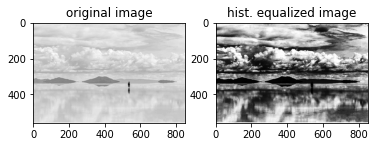

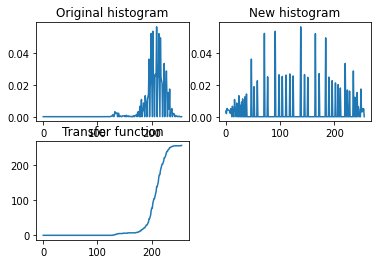

In [10]:
import pylab as plt
import matplotlib.image as mpimg
import numpy as np
img = np.uint8(mpimg.imread('/content/image10.png')*255.0)

img = np.uint8((0.2126* img[:,:,0]) + \
  		np.uint8(0.7152 * img[:,:,1]) +\
			 np.uint8(0.0722 * img[:,:,2]))

new_img, h, new_h, sk = histeq(img)

plt.subplot(1,2,1)
plt.imshow(img)
plt.title('original image')
plt.set_cmap('gray')
# show original image
plt.subplot(1,2,2)
plt.imshow(new_img)
plt.title('hist. equalized image')
plt.set_cmap('gray')
plt.show()

# plot histograms and transfer function
fig = plt.figure()
fig.add_subplot(2,2,1)
plt.plot(h)
plt.title('Original histogram') # original histogram

fig.add_subplot(2,2,2)
plt.plot(new_h)
plt.title('New histogram') #hist of eqlauized image

fig.add_subplot(2,2,3)
plt.plot(sk)
plt.title('Transfer function') #transfer function

plt.show()

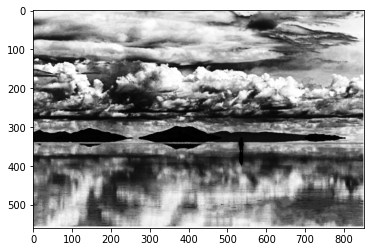

In [14]:
plt.imshow(new_img)